In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Parámetros del problema
N = 80  # Tamaño de la grilla
delta = 2.0 / (N - 1)  # Tamaño del paso en la malla
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
rho = -X - Y  # Densidad de carga
phi = np.random.rand(N, N)  # Inicializamos phi con valores aleatorios

# Condición de frontera: φ(x, y) = sin(7θ)
theta = np.arctan2(Y, X)
phi[np.sqrt(X**2 + Y**2) >= 1] = np.sin(7 * theta[np.sqrt(X**2 + Y**2) >= 1])

# Parámetros de la iteración
tol = 1e-4  # Tolerancia para el método iterativo
max_iter = 15000  # Número máximo de iteraciones

# Función para calcular la traza
def calc_trace(phi_old, phi_new):
    return np.trace(np.abs(phi_old - phi_new))

# Iteración con método de relajación
for it in range(max_iter):
    phi_old = phi.copy()
    
    # Actualizamos los puntos en el interior del círculo unitario
    for i in range(1, N-1):
        for j in range(1, N-1):
            if X[i, j]**2 + Y[i, j]**2 < 1:  # Solo en el interior del círculo
                phi[i, j] = 0.25 * (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]
                                    - delta**2 * 4 * np.pi * rho[i, j])
    
    # Criterio de convergencia usando la traza
    trace_value = calc_trace(phi_old, phi)
    if trace_value < tol:
        print(f'Convergencia alcanzada en {it} iteraciones con traza {trace_value:.5f}.')
        break
else:
    print(f'No se alcanzó la convergencia después de {max_iter} iteraciones.')



Convergencia alcanzada en 3372 iteraciones con traza 0.00010.


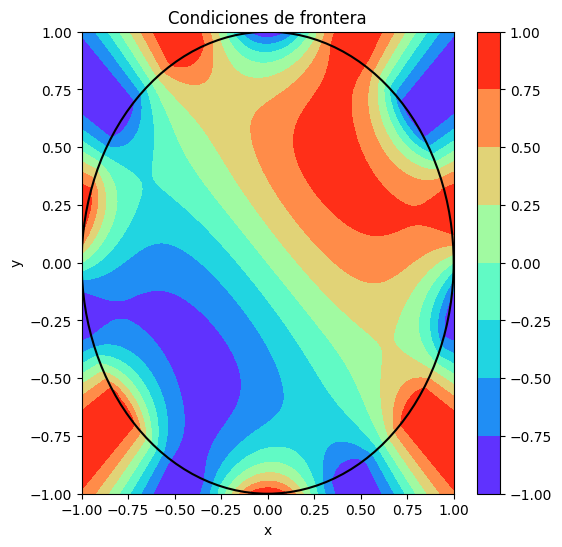

In [9]:
# Graficar la solución en 2D
fig, ax = plt.subplots(figsize=(6, 6))
c = ax.contourf(X, Y, phi, cmap='rainbow')

# Añadir el círculo unitario en el gráfico
circle = plt.Circle((0, 0), 1, color='k', fill=False, linewidth=1.5)
ax.add_artist(circle)

# Añadir color y etiquetas
plt.colorbar(c)
ax.set_title('Condiciones de frontera')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Mostrar gráfico
plt.show()

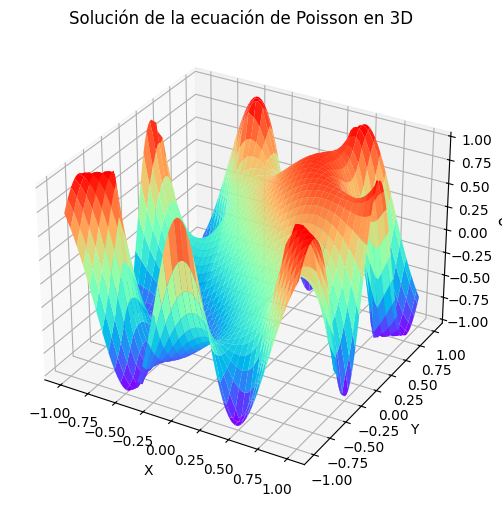

In [10]:
# Graficar la solución en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficamos phi(x, y)
ax.plot_surface(X, Y, phi, cmap='rainbow')
ax.set_title('Solución de la ecuación de Poisson en 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Φ')
plt.show()


                                                                EXTRA

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

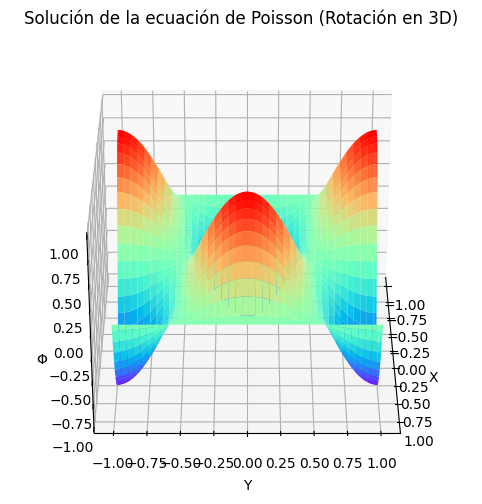

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Definir la función de animación
def update_view_angle(frame, ax):
    # Ajustar el ángulo de vista azimutal en cada frame
    ax.view_init(elev=30, azim=frame)
    return ax,

# Crear los datos (X, Y, y phi) que vamos a graficar
N = 80
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

# Supongamos que tenemos la solución phi de la ecuación de Poisson
# Si no tienes esta solución, inicializamos con una función arbitraria
phi = np.sin(np.pi * X) * np.cos(np.pi * Y)

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie inicial
surf = ax.plot_surface(X, Y, phi, cmap='rainbow')

# Configurar los ejes y el título
ax.set_title('Solución de la ecuación de Poisson (Rotación en 3D)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Φ')

# Crear la animación
anim = FuncAnimation(fig, update_view_angle, frames=np.arange(0, 360, 2), fargs=(ax,), interval=50)

# Guardar la animación como un archivo de video (MP4) o mostrarla
anim.save('rotacion_3d.mp4', writer='ffmpeg')  # Requiere tener instalado ffmpeg

# O bien, puedes mostrar la animación en vivo (si estás en un entorno interactivo como Jupyter)
# plt.show()
